In [11]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0,'..')
import numpy as np
import pynamod
from pynamod.bp_step_geometry import get_params_for_single_step_debug
from pynamod.parsers_3dna import parse_bp_par_file

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## ref frames to bp steps

In [12]:
#recreation stuff from 3dna example
o1 = np.array([15.0378, 0.1221, -4.6088])
o2 = np.array([14.6869, 2.9781, -2.3818])

R1=np.array([
[-0.2323, -0.8985, -0.3724],
[0.7889, -0.3980, 0.4682],
[-0.5689, -0.1851, 0.8013]])
R2=np.array([
[-0.6319, -0.6594, -0.4072],
[0.3583, -0.7144, 0.6010],
[-0.6873, 0.2339, 0.6877]])


print(get_params_for_single_step_debug(o1,o2,R1,R2))

hinge axis
[-0.8993 -0.3955 -0.1868]
Roll Tilt angle, degrees
10.236212178842694
R_hinge
[[ 0.9992 -0.0153  0.036 ]
 [ 0.0181  0.9966 -0.0799]
 [-0.0346  0.0805  0.9962]]
R2'
[[-0.6616 -0.6396 -0.3913]
 [ 0.4006 -0.7426  0.5366]
 [-0.6339  0.1983  0.7475]]
R1'
[[-0.1982 -0.8986 -0.3914]
 [ 0.744  -0.3979  0.5368]
 [-0.6381 -0.1849  0.7474]]
Rm
[[-0.4489 -0.8033 -0.3914]
 [ 0.5977 -0.5956  0.5367]
 [-0.6642  0.007   0.7475]]
om
[14.8623  1.5501 -3.4953]
Shift Slide Rise
[0.3852440347155438, -1.403484763912353, 3.334931049983717]
phi  16.945209828180445
(0.3852440347155438, -1.403484763912353, 3.334931049983717, 2.983416580378309, 9.791795814773268, 33.522498611952365)


In [13]:
o1 = np.array([15.0378, 0.1221, -4.6088])
o2 = np.array([14.6869, 2.9781, -2.3818])

R1=np.array([
[-0.2323, -0.8985, -0.3724],
[0.7889, -0.3980, 0.4682],
[-0.5689, -0.1851, 0.8013]])
R2=np.array([
[-0.6319, -0.6594, -0.4072],
[0.3583, -0.7144, 0.6010],
[-0.6873, 0.2339, 0.6877]])

from pynamod.bp_step_geometry import get_params_for_single_step_stock, get_params_for_single_step_numba2

print(get_params_for_single_step_stock(o1,o2,R1,R2))
#%timeit get_params_for_single_step_stock(o1,o2,R1,R2)
print(get_params_for_single_step_numba2(o1,o2,R1,R2))
#%timeit get_params_for_single_step_numba2(o1,o2,R1,R2)

(0.3688784331163958, -1.3437836422562135, 3.3348633456846515, 2.8195223211845715, 9.840240528088195, 31.645213532807098)
(0.3688784331163958, -1.3437836422562135, 3.3348633456846515, 2.8195223211845715, 9.840240528088195, 31.645213532807098)


## bp steps to ref frames

In [14]:
from pynamod.bp_step_geometry import get_ori_and_mat_from_step,get_ori_and_mat_from_step_opt
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)
o1 = np.array([15.0378, 0.1221, -4.6088])
o2 = np.array([14.6869, 2.9781, -2.3818])

R1=np.array([
[-0.2323, -0.8985, -0.3724],
[0.7889, -0.3980, 0.4682],
[-0.5689, -0.1851, 0.8013]])
R2=np.array([
[-0.6319, -0.6594, -0.4072],
[0.3583, -0.7144, 0.6010],
[-0.6873, 0.2339, 0.6877]])

params=get_params_for_single_step_stock(o1,o2,R1,R2)

get_ori_and_mat_from_step(*params,R1,o1)
get_ori_and_mat_from_step_opt(*params,R1,o1)
#%timeit get_ori_and_mat_from_step(*params,R1,o1)
#%timeit get_ori_and_mat_from_step_opt(*params,R1,o1)

(array([14.661 ,  2.9233, -2.3561]), array([[-0.6098, -0.6798, -0.4073],
        [ 0.3814, -0.7022,  0.6011],
        [-0.6947,  0.2112,  0.6875]]))

In [15]:
from pynamod.bp_step_geometry import rebuild_by_full_par_frame_numba
header,pairtypes,full_par_frame=parse_bp_par_file('Resources/1kx5.par')
bp_frames=rebuild_by_full_par_frame_numba(full_par_frame)
#bp_frames

Processing  Resources/1kx5.par


In [16]:
from pynamod.visual_ngl import show_ref_frames
show_ref_frames(bp_frames)

NGLWidget()

## Creating special steps (histone octameres, dyes, etc)

In [17]:
# histone octamer from 1kx5
import MDAnalysis as mda
import nglview as nv
from pynamod.non_DNA_geometry import get_obj_orientation_and_location,get_rotation_and_offset_ref_frame_to_obj
from pynamod.parsers_3dna import ref_frames_to_array
nucl = mda.Universe('Resources/1KX5.pdb')
bp_frames_1kx5=ref_frames_to_array('Resources/1kx5_ref_frames.dat')[0]

sel_text="(segid A E and (resid 44:135 or (resid 43 and name C O CA))) or \
(segid B F and (resid 23:102 or (resid 22 and name C O CA))) or \
(segid C G and (resid 16:102 or (resid 15 and name C O CA) or (resid 103 and name N CA))) or \
(segid D H and (resid 34:122 or (resid 33 and name C O CA)))"

nucl_trunc=nucl.select_atoms(sel_text)
nucl_trunc.atoms
view=nv.show_mdanalysis(nucl_trunc)

cog=nucl_trunc.atoms.center_of_geometry()
axes=nucl_trunc.atoms.principal_axes()


o1 = bp_frames_1kx5[73,3,:3]
o2 = cog

ref_mat=bp_frames_1kx5[73,:3,:3]
obj_mat=axes

# gettng rotation and offset from dyad base pair to histone core
R2,of_vec=get_rotation_and_offset_ref_frame_to_obj(ref_mat,o1,obj_mat,o2)

#getting location and orientation of histone core from the above
calcR2,calcO2=get_obj_orientation_and_location(ref_mat,o1,R2,of_vec)

view=show_ref_frames(bp_frames_1kx5,view,spheres=False,arrows=False,diamonds=False,boxes=True)

view.shape.add_sphere(o2.tolist(),[0,1,0],3)
view.shape.add_arrow(calcO2.tolist(),(calcO2 + 40*calcR2[0]).tolist(),[1,0,0],3)
view.shape.add_arrow(calcO2.tolist(),(calcO2 + 40*calcR2[1]).tolist(),[0,1,0],3)
view.shape.add_arrow(calcO2.tolist(),(calcO2 + 40*calcR2[2]).tolist(),[0,0,1],3)


view

NGLWidget()

Processing  Resources/init_fiber.par


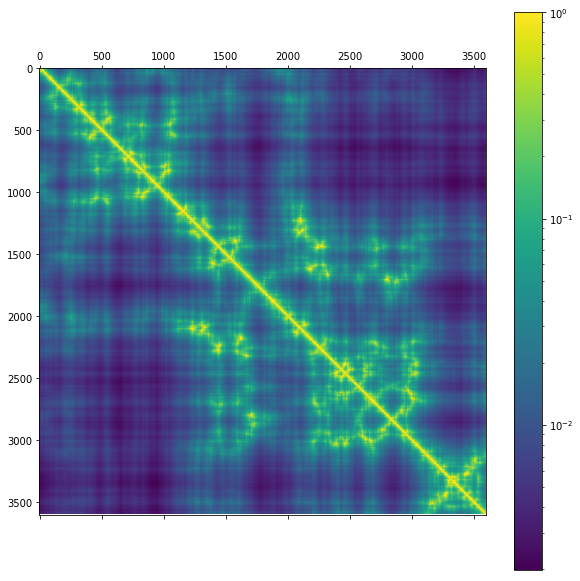

In [69]:
header,pairtypes,full_par_frame=parse_bp_par_file('Resources/init_fiber.par')
full_par_frame=np.tile(full_par_frame,(300,1))
N=12*300
nps_length=147
linker_length=40
from pynamod.utils import get_movable_steps

movable_steps=get_movable_steps([[i,i+linker_length+15] for i in (nps_length+linker_length)* np.arange(N)])

for i in np.arange(5):
    full_par_frame[movable_steps,9:12]+=np.random.normal(0,1,size=full_par_frame[movable_steps,9:12].shape)


bp_frames=rebuild_by_full_par_frame_numba(full_par_frame)

beads=[]
for i in (nps_length+linker_length)* np.arange(N)+73+linker_length:
    full_par_frame
    o1 = bp_frames[i,3,:3]
    R1=bp_frames[i,:3,:3]
    mat,ori=get_obj_orientation_and_location(R1,o1,R2,of_vec)
    beads.extend(ori)
octamers=np.array(beads).reshape((-1,3))
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
plt.rcParams['figure.figsize'] = [10, 10]
distances=cdist(octamers,octamers)

contact_dist=500
plt.matshow(1/(1+(distances/contact_dist)**2),norm=LogNorm())
plt.colorbar()
plt.show()


In [70]:
view=show_ref_frames(bp_frames,arrows=False,diamonds=False,boxes=False)
view.shape.add_buffer('sphere',position=beads,color=[1,0,0]*(len(beads)//3),radius=[35]*(len(beads)//3))
view

NGLWidget()

In [71]:
view.download_image('3600_nucl_fiber_2.png',factor=8)